# Assignment 4 - Interpretable ML II

---



### 1. Algorithms Selection
- **OneR rule list**: The oneR algorithm returns a rule list that splits on only one (usually continuous) feature It works by building a greedy rule list using only one feature at a time, and then returning the rule list with the highest accuracy

- **Slipper rule set**: An easy-interpretable classifier optimizing simple logical rules.


- **Greedy rule list**: Greedily splits on one feature at a time along a single path. Tries to find rules which maximize the probability of class 1. Currently only supports binary classification.

### 2. Dataset Selection

- **Hotel Booking Cancelations**: This dataset contains detailed information about hotel bookings, including cancellations. It includes variables such as booking date, cancellation status, lead time, customer type, and hotel type (city or resort). The dataset is useful for analyzing trends in hotel booking cancellations, understanding customer behavior, and predicting cancellation likelihood.

Resource Link: https://www.kaggle.com/datasets/muhammaddawood42/hotel-booking-cancelations/data

### 3. Demonstration for each of algorithms

In [16]:
!pip install imodels

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imodels.rule_list.rule_list import RuleList
from imodels.util.arguments import check_fit_arguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import graphviz
from sklearn import tree
from sklearn.tree import export_graphviz

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
# Loading the dataset
df = pd.read_csv('hotel_booking.csv')
df.head()
df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [19]:
# drop 'company' row for handling missing data
df.drop('company', axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
df.dropna(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### 3-1. OneR rule list

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'lead_time': 0.6054715972593421, 'arrival_date_year': 0.6054715972593421, 'arrival_date_week_number': 0.6054715972593421, 'arrival_date_day_of_month': 0.6054715972593421, 'stays_in_weekend_nights': 0.605811749842072, 'stays_in_week_nights': 0.6054715972593421, 'adults': 0.6054715972593421, 'children': 0.6054715972593421, 'babies': 0.6054715972593421, 'is_repeated_guest': 0.6054715972593421, 'previous_cancellations': 0.6054715972593421, 'previous_bookings_not_canceled': 0.6054715972593421, 'booking_changes': 0.6054715972593421, 'agent': 0.6397784148889645, 'days_in_waiting_list': 0.6134408863404441, 'adr': 0.6054715972593421, 'required_car_parking_spaces': 0.6054715972593421, 'total_of_special_requests': 0.6240828028572817}


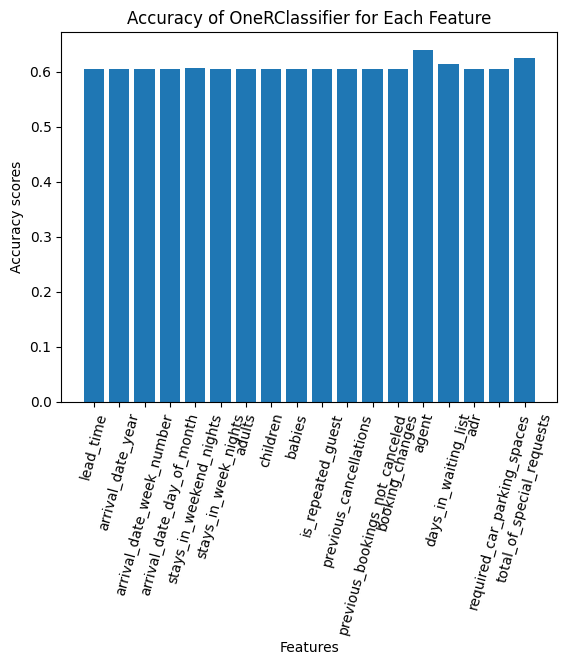

In [31]:
from imodels import OneRClassifier
from imodels.rule_list.rule_list import RuleList


X = df.drop(columns=['is_canceled','hotel','country', 'arrival_date_month', 'market_segment', 'meal', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date', 'name', 'email', 'phone-number', 'credit_card'])
y = df['is_canceled']

acc_bar_data = {}

for col_name, col_data in X.items():
  # Split data into training and testing
  X_train,X_test, y_train, y_test = train_test_split(col_data.values.reshape(-1,1), y, test_size=0.2, random_state=0)

  orc = OneRClassifier()

  orc.fit(X_train, y_train)
  y_pred = orc.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  acc_bar_data[col_name]=acc

print(acc_bar_data)

keys = list(acc_bar_data.keys())
values = list(acc_bar_data.values())

# Create a bar chart
plt.bar(keys, values)

# Add title and labels
plt.title('Accuracy of OneRClassifier for Each Feature')
plt.xlabel('Features')
plt.ylabel('Accuracy scores')
plt.xticks(rotation=75)

# Show the plot
plt.show()

#### 3-1-2. Explanation of the method using a diagram

In [28]:
!apt-get install graphviz
!pip install graphviz

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


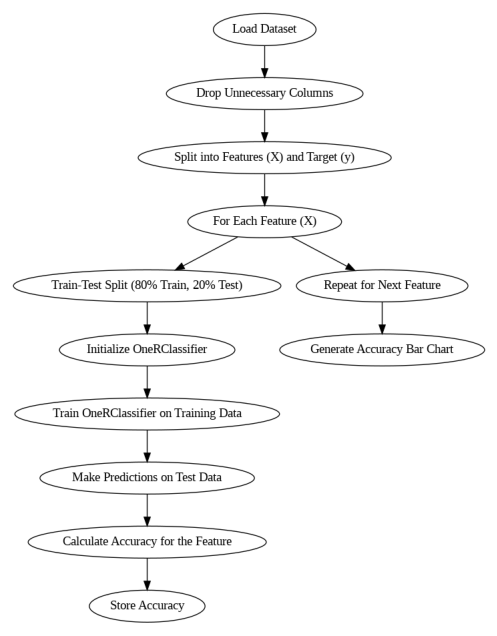

In [33]:
from graphviz import Digraph
# Initialize the graph object
dot = Digraph(comment='OneRClassifier Process')

# Add nodes to the diagram representing key steps
dot.node('A', 'Load Dataset')
dot.node('B', 'Drop Unnecessary Columns')
dot.node('C', 'Split into Features (X) and Target (y)')
dot.node('D', 'For Each Feature (X)')
dot.node('E', 'Train-Test Split (80% Train, 20% Test)')
dot.node('F', 'Initialize OneRClassifier')
dot.node('G', 'Train OneRClassifier on Training Data')
dot.node('H', 'Make Predictions on Test Data')
dot.node('I', 'Calculate Accuracy for the Feature')
dot.node('J', 'Store Accuracy')
dot.node('K', 'Repeat for Next Feature')
dot.node('L', 'Generate Accuracy Bar Chart')

# Define the edges between the nodes
dot.edges(['AB', 'BC', 'CD', 'DE', 'EF', 'FG', 'GH', 'HI', 'IJ', 'DK', 'KL'])

# Save and display the diagram
dot.render('OneRClassifier_Process', format='png')

# Display the diagram using matplotlib
img = plt.imread('OneRClassifier_Process.png')
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

- Simplicity: The classifier uses only one feature to make decisions, which makes it simple and easy to interpret.
- Predictive Power: By focusing on the most predictive feature, the classifier can still provide reasonable predictions, but it may not be as accurate as more complex models.
- Rules-Based: The process of splitting features and assigning rules makes it easy to explain the decision-making process.

#### 3-2. Slipper rule set

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will b

{'lead_time': 0.41790174449681716, 'arrival_date_year': 0.4983235336994023, 'arrival_date_week_number': 0.40045677632538024, 'arrival_date_day_of_month': 0.40249769182176004, 'stays_in_weekend_nights': 0.465766072209534, 'stays_in_week_nights': 0.41892220224500704, 'adults': 0.39608338597599496, 'children': 0.5881238155401137, 'babies': 0.6014383594926868, 'is_repeated_guest': 0.6054715972593421, 'previous_cancellations': 0.6593614850089897, 'previous_bookings_not_canceled': 0.5974051217260314, 'booking_changes': 0.5177122309150104, 'agent': 0.3602701783371398, 'days_in_waiting_list': 0.6134894795665484, 'adr': 0.394528402740658, 'required_car_parking_spaces': 0.5532824724233442, 'total_of_special_requests': 0.3760629768210311}


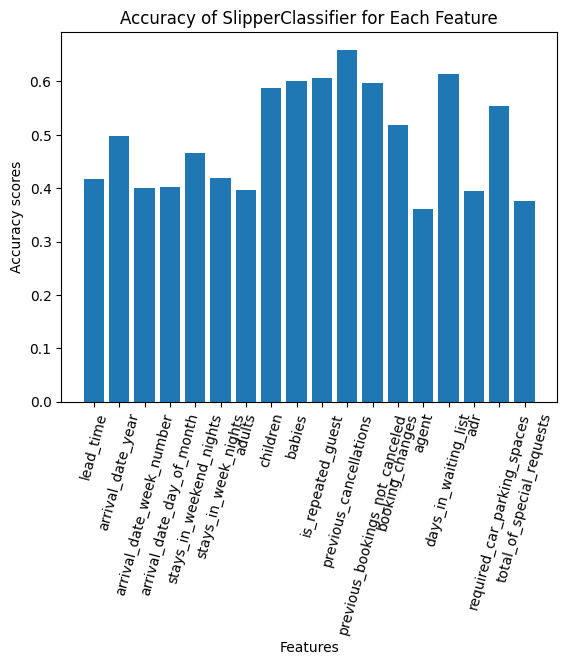

In [35]:
from imodels import SlipperClassifier

X = df.drop(columns=['is_canceled','hotel','country', 'arrival_date_month', 'market_segment', 'meal', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date', 'name', 'email', 'phone-number', 'credit_card'])
y = df['is_canceled']

acc_bar_data = {}

for col_name, col_data in X.items():
  # Split data into training and testing
  X_train,X_test, y_train, y_test = train_test_split(col_data.values.reshape(-1,1), y, test_size=0.2, random_state=0)

  grlc = SlipperClassifier()

  grlc.fit(X_train, y_train)
  y_pred = grlc.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  acc_bar_data[col_name]=acc

print(acc_bar_data)

keys = list(acc_bar_data.keys())
values = list(acc_bar_data.values())

# Create a bar chart
plt.bar(keys, values)

# Add title and labels
plt.title('Accuracy of SlipperClassifier for Each Feature')
plt.xlabel('Features')
plt.ylabel('Accuracy scores')
plt.xticks(rotation=75)

# Show the plot
plt.show()

3-2-2. Explanation of the method using a diagram

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


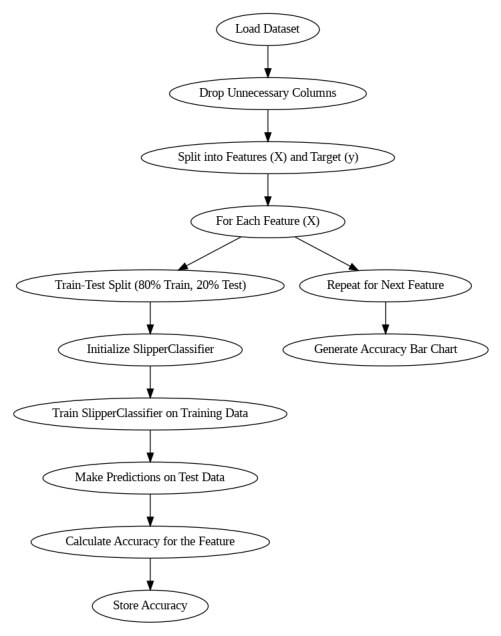

In [37]:
# Create a new graph to represent the SlipperClassifier process
dot = Digraph(comment='SlipperClassifier Process')

# Add nodes to represent steps in the SlipperClassifier process
dot.node('A', 'Load Dataset')
dot.node('B', 'Drop Unnecessary Columns')
dot.node('C', 'Split into Features (X) and Target (y)')
dot.node('D', 'For Each Feature (X)')
dot.node('E', 'Train-Test Split (80% Train, 20% Test)')
dot.node('F', 'Initialize SlipperClassifier')
dot.node('G', 'Train SlipperClassifier on Training Data')
dot.node('H', 'Make Predictions on Test Data')
dot.node('I', 'Calculate Accuracy for the Feature')
dot.node('J', 'Store Accuracy')
dot.node('K', 'Repeat for Next Feature')
dot.node('L', 'Generate Accuracy Bar Chart')

# Define the edges between the nodes (showing process flow)
dot.edges(['AB', 'BC', 'CD', 'DE', 'EF', 'FG', 'GH', 'HI', 'IJ', 'DK', 'KL'])

# Render and display the diagram
dot.render('SlipperClassifier_Process', format='png')

# Display the diagram using matplotlib
img = plt.imread('SlipperClassifier_Process.png')
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

1. Start with Empty Rule Set: The algorithm begins without any rules.

2. Select a Feature: The algorithm picks a feature from the dataset to generate a rule.

3. Generate Rule Based on Feature: The rule is created based on the selected feature, and the rule aims to separate one class from the others.

4. Test Rule on Data: The newly generated rule is tested on the training data to see how well it predicts the target variable.

5. Remove Correctly Classified Data: Any data points that are correctly classified by the rule are removed from further consideration, leaving the misclassified points for the next rule.

6. Add Rule to Rule Set: The correctly classified rule is added to the overall rule set.

7. Repeat Until Rules are Generated: This process repeats, adding more rules to the set until no further improvement can be made or a predefined stopping point is reached.

8. Use Rules to Predict New Data: For prediction, the model checks each rule in the order they were generated. The first rule that applies to the data point makes the prediction.

#### 3-3. Greedy Rule List

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'lead_time': 0.6054715972593421, 'arrival_date_year': 0.6054715972593421, 'arrival_date_week_number': 0.6054715972593421, 'arrival_date_day_of_month': 0.6054715972593421, 'stays_in_weekend_nights': 0.605811749842072, 'stays_in_week_nights': 0.6054715972593421, 'adults': 0.6054715972593421, 'children': 0.6054715972593421, 'babies': 0.6054715972593421, 'is_repeated_guest': 0.6054715972593421, 'previous_cancellations': 0.6054715972593421, 'previous_bookings_not_canceled': 0.6054715972593421, 'booking_changes': 0.6054715972593421, 'agent': 0.6397784148889645, 'days_in_waiting_list': 0.6134408863404441, 'adr': 0.6054715972593421, 'required_car_parking_spaces': 0.6054715972593421, 'total_of_special_requests': 0.6240828028572817}


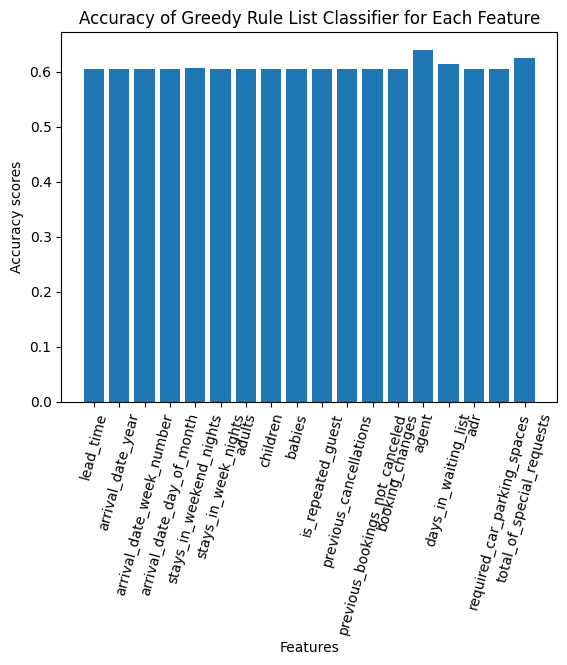

In [27]:
from imodels import GreedyRuleListClassifier

X = df.drop(columns=['is_canceled','hotel','country', 'arrival_date_month', 'market_segment', 'meal', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date', 'name', 'email', 'phone-number', 'credit_card'])
y = df['is_canceled']

acc_bar_data = {}

for col_name, col_data in X.items():
  # Split data into training and testing
  X_train,X_test, y_train, y_test = train_test_split(col_data.values.reshape(-1,1), y, test_size=0.2, random_state=0)

  grlc = GreedyRuleListClassifier()

  grlc.fit(X_train, y_train)
  y_pred = grlc.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  acc_bar_data[col_name]=acc

print(acc_bar_data)

keys = list(acc_bar_data.keys())
values = list(acc_bar_data.values())

# Create a bar chart
plt.bar(keys, values)

# Add title and labels
plt.title('Accuracy of Greedy Rule List Classifier for Each Feature')
plt.xlabel('Features')
plt.ylabel('Accuracy scores')
plt.xticks(rotation=75)

# Show the plot
plt.show()


#### 3-3-2. Explanation of the method using a diagram

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


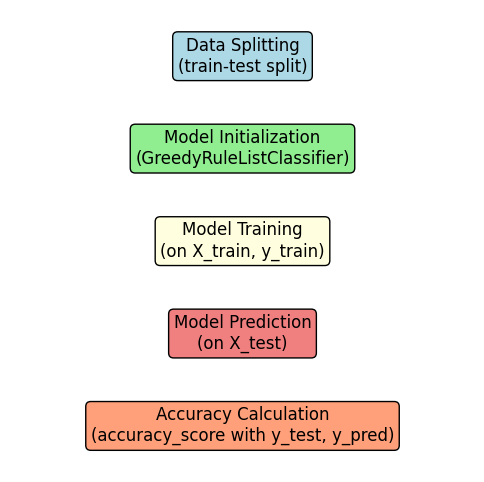

In [30]:
fig, ax = plt.subplots(figsize=(6, 6))

# Define the boxes (steps in the process)
ax.text(0.5, 0.9, 'Data Splitting\n(train-test split)', ha='center', va='center', fontsize=12,
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightblue"))
ax.text(0.5, 0.7, 'Model Initialization\n(GreedyRuleListClassifier)', ha='center', va='center', fontsize=12,
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightgreen"))
ax.text(0.5, 0.5, 'Model Training\n(on X_train, y_train)', ha='center', va='center', fontsize=12,
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightyellow"))
ax.text(0.5, 0.3, 'Model Prediction\n(on X_test)', ha='center', va='center', fontsize=12,
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightcoral"))
ax.text(0.5, 0.1, 'Accuracy Calculation\n(accuracy_score with y_test, y_pred)', ha='center', va='center', fontsize=12,
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightsalmon"))

# Hide the axes
ax.axis('off')

plt.show()


1. Rule Generation: The classifier builds a sequence of decision rules that can predict the outcome. Based on features in the data, each rule checks whether a specific condition on one or more features is satisfied.

2. Greedy Approach: The algorithm follows a greedy strategy, meaning it builds the rule list step by step, adding one rule at a time. At each step, it selects the rule that best improves the model's accuracy or minimizes error on the training data.

3. Interpretability: Since the algorithm generates a small number of human-readable rules, the resulting model is easy to interpret.

4. Training Process:

- The classifier first splits the dataset into training and testing sets.
- iterate over the features and creates a list of rules that partition the data based on different conditions.
- Fit these rules to the training data and evaluates how well they predict the target variable.
- New rules are added until the accuracy stops improving, or a maximum number of rules is reached.
5. Prediction: Once the rule list is generated, predictions for new data are made by checking which rules apply to the input data and using the corresponding predictions.